In [1]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
%matplotlib inline

# Project Details

## In this notebook tasks are:
- Take a look at one of the biggest game developer - EA, and check the most popular Genre and its games
- Visualize the results

In [2]:
# creating games dataframe
games = pd.read_csv('vgsales_cleared.csv')
games_copy = games.copy()
games_copy.head()

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,1,Wii,2006,Sports,Nintendo,41.50,29.02,3.77,8.46,82.75
1,Super Mario Bros.,2,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.25
2,Mario Kart Wii,3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.80
3,Wii Sports Resort,4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,5,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [3]:
# filtering data
ea = games_copy.loc[games_copy.Publisher == "Electronic Arts"]
ea.head()

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,FIFA 16,78,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,FIFA Soccer 13,83,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
83,The Sims 3,84,PC,2009,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
92,Star Wars Battlefront (2015),93,PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
99,Battlefield 3,100,X360,2011,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34


In [4]:
# creating dataframe for pie chart about sales in ea by genre
ea_genres = ea.groupby('Genre')['Global_Sales'].sum()
ea_genres

Genre
Action          115.34
Adventure         4.75
Fighting         30.85
Misc             19.74
Platform          6.53
Puzzle            4.55
Racing          145.77
Role-Playing     35.30
Shooter         158.26
Simulation       89.53
Sports          468.69
Strategy         14.08
Name: Global_Sales, dtype: float64

In [5]:
ea_genres = ea_genres.to_frame()
ea_genres

,Global_Sales
Genre,
Action,115.34
Adventure,4.75
Fighting,30.85
Misc,19.74
Platform,6.53
Puzzle,4.55
Racing,145.77
Role-Playing,35.30
Shooter,158.26


In [6]:
other = ea_genres.Global_Sales[ea_genres.Global_Sales < 40].sum()

In [7]:
ea_genres.drop(ea_genres.index[ea_genres.Global_Sales < 40], inplace=True)

In [8]:
other = pd.DataFrame({'Genre': ['Other'], 'Global_Sales' : other}).set_index('Genre')

In [9]:
ea_genres = pd.concat([ea_genres, other])

In [10]:
ea_genres

,Global_Sales
Genre,
Action,115.34
Racing,145.77
Shooter,158.26
Simulation,89.53
Sports,468.69
Other,115.80


Text(0.5, 1.0, 'Most sold genres in EA')

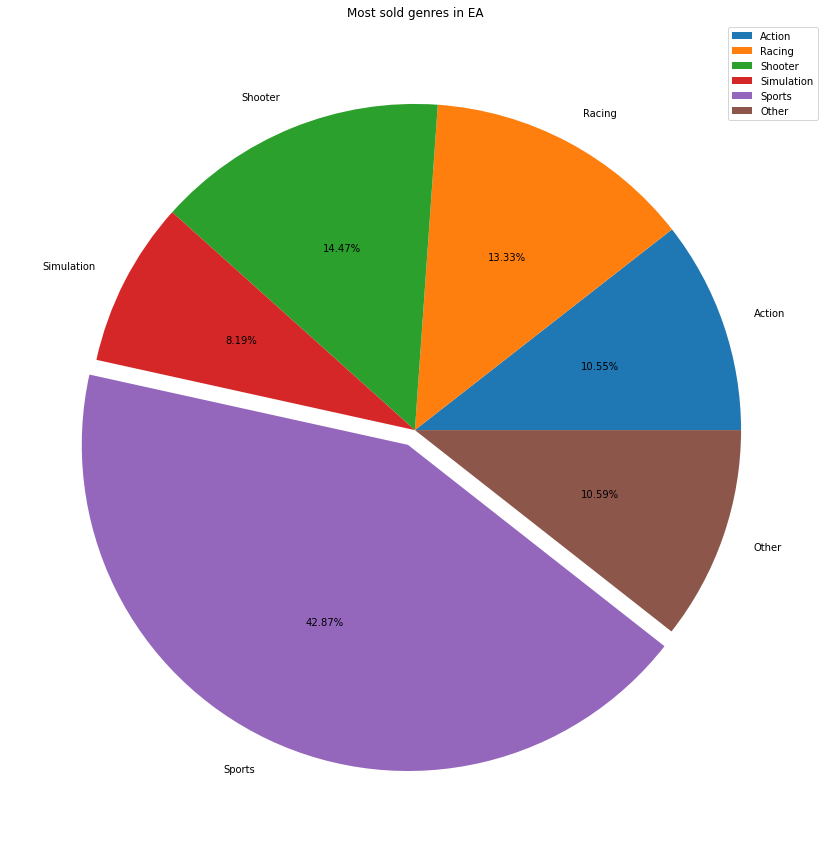

In [11]:
# creating pie chart
plt.figure(figsize=(15,15))
plt.pie(ea_genres.Global_Sales, labels=ea_genres.index, autopct='%.2f%%', explode=[0,0,0,0,0.05,0])
plt.legend(ea_genres.index)
plt.title('Most sold genres in EA')

As it can be clearly seen, EA sells a lot of Sports game. Let's look into that a bit more

In [12]:
ea_sports = ea.loc[ea.Genre == 'Sports']
ea_sports.head(30)

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,FIFA 16,78,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
112,FIFA 14,113,PS3,2013,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
121,FIFA 12,122,PS3,2011,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
124,FIFA 15,125,PS4,2014,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
198,FIFA Soccer 11,200,PS3,2010,Sports,Electronic Arts,0.60,3.29,0.06,1.13,5.08
210,Madden NFL 06,212,PS2,2005,Sports,Electronic Arts,3.98,0.26,0.01,0.66,4.91
218,FIFA 15,220,PS3,2014,Sports,Electronic Arts,0.57,3.14,0.04,1.07,4.82
220,FIFA 17,222,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
237,Madden NFL 2005,239,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53
239,Madden NFL 07,241,PS2,2006,Sports,Electronic Arts,3.63,0.24,0.01,0.61,4.49


As we can see there is some sport brands that EA owns. Let's check which one is the most popular

In [13]:
# lowering all signs in colimns name for easier filtering
ea_sports.Name = ea_sports.Name.str.lower()
ea_sports_copy = ea_sports.copy()
ea_sports.head()

C:\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,fifa 16,78,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
112,fifa 14,113,PS3,2013,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
121,fifa 12,122,PS3,2011,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
124,fifa 15,125,PS4,2014,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
198,fifa soccer 11,200,PS3,2010,Sports,Electronic Arts,0.60,3.29,0.06,1.13,5.08


In [14]:
# creating a dictionary where sport brand sales data will be kept 
brands = {}
# sum of all fifa sales titles
fifa_sales = ea_sports.loc[ea_sports.Name.str.contains('fifa')]['Global_Sales'].sum()
# adding it to brands 
brands['Fifa'] = fifa_sales

In [15]:
ea_sports.drop(ea_sports.loc[ea_sports.Name.str.contains('fifa')].index, inplace=True)
ea_sports.head()

C:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
210,madden nfl 06,212,PS2,2005,Sports,Electronic Arts,3.98,0.26,0.01,0.66,4.91
237,madden nfl 2005,239,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53
239,madden nfl 07,241,PS2,2006,Sports,Electronic Arts,3.63,0.24,0.01,0.61,4.49
278,madden nfl 2003,280,PS2,2002,Sports,Electronic Arts,3.36,0.21,0.01,0.56,4.14
302,ea sports active,304,Wii,2009,Sports,Electronic Arts,2.10,1.36,0.06,0.40,3.92


In [16]:
maden_sales = ea_sports.loc[ea_sports.Name.str.contains('madden')]['Global_Sales'].sum()
brands['Madden'] = maden_sales
ea_sports.drop(ea_sports.loc[ea_sports.Name.str.contains('madden')].index, inplace=True)
ea_sports.head()

C:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
302,ea sports active,304,Wii,2009,Sports,Electronic Arts,2.10,1.36,0.06,0.40,3.92
530,nba street,535,PS2,2001,Sports,Electronic Arts,2.19,0.22,0.00,0.38,2.79
555,skate 3,560,X360,2010,Sports,Electronic Arts,1.46,0.98,0.00,0.24,2.68
587,nba live 2005,592,PS2,2004,Sports,Electronic Arts,2.03,0.21,0.00,0.35,2.59
797,skate 3,809,PS3,2010,Sports,Electronic Arts,0.79,0.94,0.00,0.35,2.08


In [17]:
nba_sales = ea_sports.loc[ea_sports.Name.str.contains('nba')]['Global_Sales'].sum()
brands['NBA'] = nba_sales
ea_sports.drop(ea_sports.loc[ea_sports.Name.str.contains('nba')].index, inplace=True)
ea_sports.head()

C:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
302,ea sports active,304,Wii,2009,Sports,Electronic Arts,2.10,1.36,0.06,0.40,3.92
555,skate 3,560,X360,2010,Sports,Electronic Arts,1.46,0.98,0.00,0.24,2.68
797,skate 3,809,PS3,2010,Sports,Electronic Arts,0.79,0.94,0.00,0.35,2.08
932,ncaa football 06,944,PS2,2005,Sports,Electronic Arts,1.53,0.05,0.00,0.25,1.84
1015,ssx tricky,1027,PS2,2001,Sports,Electronic Arts,0.85,0.66,0.00,0.22,1.73


In [18]:
ea_sports.head(50)

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
302,ea sports active,304,Wii,2009,Sports,Electronic Arts,2.10,1.36,0.06,0.40,3.92
555,skate 3,560,X360,2010,Sports,Electronic Arts,1.46,0.98,0.00,0.24,2.68
797,skate 3,809,PS3,2010,Sports,Electronic Arts,0.79,0.94,0.00,0.35,2.08
932,ncaa football 06,944,PS2,2005,Sports,Electronic Arts,1.53,0.05,0.00,0.25,1.84
1015,ssx tricky,1027,PS2,2001,Sports,Electronic Arts,0.85,0.66,0.00,0.22,1.73
1046,ncaa football 07,1058,PS2,2006,Sports,Electronic Arts,1.41,0.05,0.00,0.23,1.70
1073,ssx 3,1085,PS2,2003,Sports,Electronic Arts,0.93,0.52,0.00,0.22,1.67
1085,ncaa football 2004,1097,PS2,2003,Sports,Electronic Arts,1.35,0.09,0.00,0.23,1.67
1090,ssx,1102,PS2,2000,Sports,Electronic Arts,0.78,0.61,0.06,0.20,1.66
1108,tiger woods pga tour 2003,1120,PS2,2002,Sports,Electronic Arts,0.80,0.63,0.00,0.21,1.64


checking values of another brands on the list to see if there are others with big sales

In [19]:
ea_sports.loc[ea_sports.Name.str.contains('ncaa football')]['Global_Sales'].sum()

30.58

In [20]:
ea_sports.loc[ea_sports.Name.str.contains('nhl')]['Global_Sales'].sum()

22.87

In [21]:
ea_sports.loc[ea_sports.Name.str.contains('tiger woods')]['Global_Sales'].sum()

30.959999999999994

In [22]:
ncaa_sales = ea_sports.loc[ea_sports.Name.str.contains('ncaa football')]['Global_Sales'].sum()
brands['NCAA'] = ncaa_sales
ea_sports.drop(ea_sports.loc[ea_sports.Name.str.contains('ncaa')].index, inplace=True)
ea_sports.head()

C:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
302,ea sports active,304,Wii,2009,Sports,Electronic Arts,2.10,1.36,0.06,0.40,3.92
555,skate 3,560,X360,2010,Sports,Electronic Arts,1.46,0.98,0.00,0.24,2.68
797,skate 3,809,PS3,2010,Sports,Electronic Arts,0.79,0.94,0.00,0.35,2.08
1015,ssx tricky,1027,PS2,2001,Sports,Electronic Arts,0.85,0.66,0.00,0.22,1.73
1073,ssx 3,1085,PS2,2003,Sports,Electronic Arts,0.93,0.52,0.00,0.22,1.67


In [23]:
ea_sports.loc[ea_sports.Name.str.contains('skate')]['Global_Sales'].sum()

10.09

In [24]:
tiger_sales = ea_sports.loc[ea_sports.Name.str.contains('tiger woods')]['Global_Sales'].sum()
brands['Tiger Woods'] = tiger_sales
ea_sports.drop(ea_sports.loc[ea_sports.Name.str.contains('tiger woods')].index, inplace=True)
ea_sports.head(30)

C:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
302,ea sports active,304,Wii,2009,Sports,Electronic Arts,2.10,1.36,0.06,0.40,3.92
555,skate 3,560,X360,2010,Sports,Electronic Arts,1.46,0.98,0.00,0.24,2.68
797,skate 3,809,PS3,2010,Sports,Electronic Arts,0.79,0.94,0.00,0.35,2.08
1015,ssx tricky,1027,PS2,2001,Sports,Electronic Arts,0.85,0.66,0.00,0.22,1.73
1073,ssx 3,1085,PS2,2003,Sports,Electronic Arts,0.93,0.52,0.00,0.22,1.67
1090,ssx,1102,PS2,2000,Sports,Electronic Arts,0.78,0.61,0.06,0.20,1.66
1128,nfl street 2,1142,PS2,2004,Sports,Electronic Arts,0.79,0.62,0.00,0.21,1.61
1203,mvp baseball 2005,1217,PS2,2005,Sports,Electronic Arts,1.26,0.07,0.00,0.21,1.54
1219,the simpsons skateboarding,1233,PS2,2002,Sports,Electronic Arts,0.36,0.90,0.00,0.27,1.52
1339,triple play 2000,1354,PS,1999,Sports,Electronic Arts,0.79,0.54,0.00,0.09,1.43


In [25]:
brands

{'Fifa': 155.19999999999996,
 'Madden': 115.54,
 'NBA': 43.660000000000004,
 'NCAA': 30.58,
 'Tiger Woods': 30.959999999999994}

In [26]:
ea_sports.loc[ea_sports.Name.str.contains('skate')]['Global_Sales'].sum()

10.09

In [27]:
nhl_sales = ea_sports.loc[ea_sports.Name.str.contains('nhl')]['Global_Sales'].sum()
brands['NHL'] = nhl_sales
ea_sports.drop(ea_sports.loc[ea_sports.Name.str.contains('nhl')].index, inplace=True)
ea_sports.head()

C:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
302,ea sports active,304,Wii,2009,Sports,Electronic Arts,2.10,1.36,0.06,0.40,3.92
555,skate 3,560,X360,2010,Sports,Electronic Arts,1.46,0.98,0.00,0.24,2.68
797,skate 3,809,PS3,2010,Sports,Electronic Arts,0.79,0.94,0.00,0.35,2.08
1015,ssx tricky,1027,PS2,2001,Sports,Electronic Arts,0.85,0.66,0.00,0.22,1.73
1073,ssx 3,1085,PS2,2003,Sports,Electronic Arts,0.93,0.52,0.00,0.22,1.67


In [28]:
brands['Other'] = ea_sports.Global_Sales.sum()

In [29]:
# now in order to create another chart, we'll need to add values from dictionary to lists
labels = []
values = []
for label, value in brands.items():
    labels.append(label)
    values.append(value)
    


Text(0, 0.5, 'Franchise')

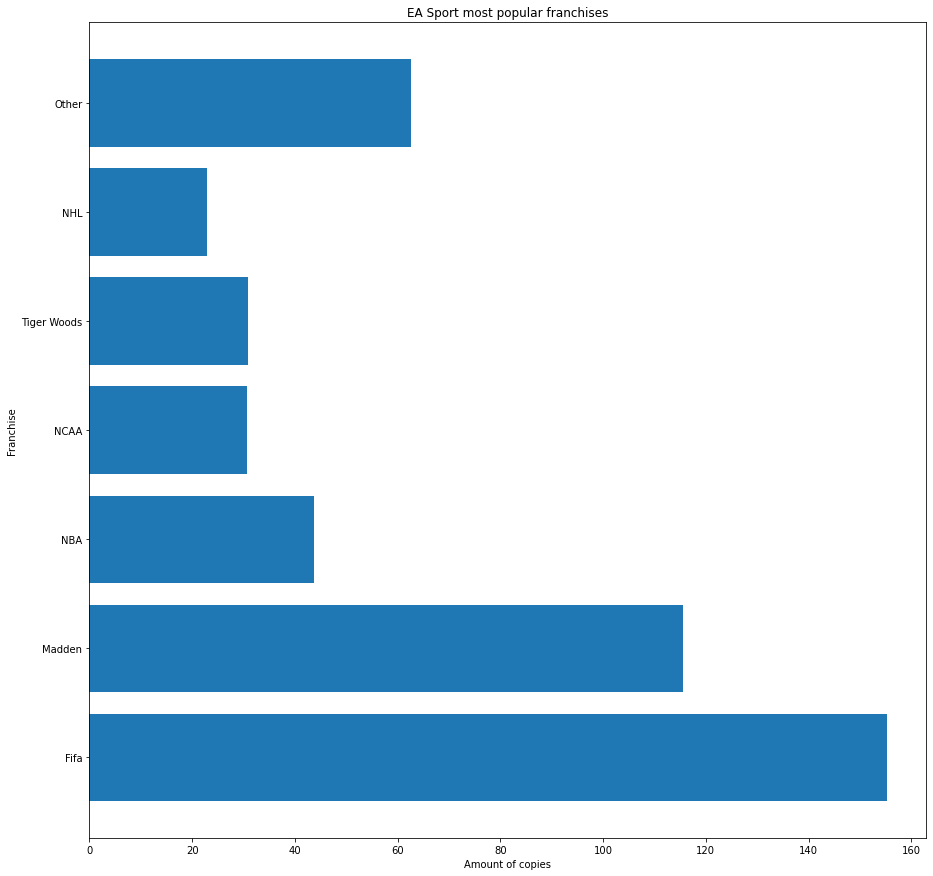

In [30]:
plt.figure(figsize=(15,15))
plt.barh(labels, width=values)
plt.title('EA Sport most popular franchises')
plt.xlabel('Amount of copies')
plt.ylabel('Franchise')

As we can see FIFA is one of the most profitable brand owned by Electronic Arts almost 160 milions copies sold. 

# References:
https://www.kaggle.com/gregorut/videogamesales